### BeautifulSoup
    BeautifulSoup은 HTML과 XMl문서를 파싱하기 위한 파이썬 라이브러리
    
    BeautifulSoup parser를 사용해서 html 문서내 태그를 구조화 하고 파이썬 객체로
    만들어서 원하는 태그를 찾을 수 있도록 도와준다
    
    BeautifulSoup 라이브러리는 외부라이브러리 이기 때문에 사용하기 위해서는
    설치부터 해야한다(아나콘다는 이미 설치되어 있음)
    
    BeautifulSoup 인터넷 홈페이지 내용을 가지고 오는 모듈이 아니라
    홈페이지 내용을 구조화해서 가져오는 모듈

In [ ]:
!pip install beautifulsoup4

### 1.네이버 URL 정보를 가져옴 - requests.get()


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
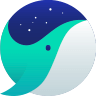
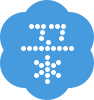

In [3]:
import requests
from bs4 import BeautifulSoup

req=requests.get("https://naver.com") # 네이버 url 정보를 가져온다
html=req.text

soup = BeautifulSoup(html,'html.parser') # BeautifulSoup을 이용해서 html.parser 파싱한다.

# print(soup)


### 3.Beautifulsoup find(),find_all()

In [5]:
result = soup.find_all('a','thumb') # a태그와 특정 클래스 등을 참조한다.
# result

news_list = []

for i in result:
    news_list.append(i.find('img')['alt'])
print(news_list)

['MBC', '한국일보', '머니투데이', '지디넷코리아', '스포츠서울', '서울신문', '마이데일리', '디지털타임스', '조선일보', 'SBS', '한국경제TV', '일간스포츠', 'OSEN', '데일리안', '스포탈코리아', '경인일보', '중부일보', '경기일보', 'PD저널', '에이블뉴스', '스포츠Q', 'OBS', 'CNB뉴스', '베이비뉴스']


In [8]:
# beautifulsoup이 가지고 있는 특정 함수들..
soup.title
soup.title.name
soup.title.string
# 태그가 여러개 있더라도 한상 첫번째 태그만 가져와서 검색한다..
soup.img
# soup.img['alt']
# soup.img['class']
soup.img['height']

import re
print(soup.find_all(string=re.compile("네이버")))

['네이버', '네이버를 시작페이지로', '쥬니어네이버', '네이버뉴스', '언론사가 직접 편집한 뉴스들을 네이버 홈에서 바로 보실 수 있습니다.', "[안내] '온라인 공연' '공연 예매순위'도 이제 네이버에서 검색해 보세요.", '네이버 개발자 센터', '네이버 D2', '네이버 D2SF', '네이버 랩스', '네이버 정책 및 약관', '네이버 정책']


### BeautifulSoup의 select_one(),select()
    find(),find_all() ---- 태그 기반 검색
    select_one(), select() ---- 선택자 기반

In [ ]:
print(soup.select_one('a'))
print(soup.select('a'))



In [ ]:
#css 선택자 사용하는 기법 그래도 사용한다.
body = soup.select('body a')

ul = soup.select('div>ul')


### BeautifulSoup get_Text(), get()
    get_text() -- 검색 결과에서 태그를 제외한 텍스트만 가져옴
    get('속성') --- 해당속성의값만 가져옴
    string() -- 검색결과에서 태그안의 또다른 태그가 없는 경우에만 내용 출력


In [9]:
text = soup.find('span',attrs={'class':'blind'})
text

<span class="blind">NAVER whale</span>

### BeauifulSoup 사용해서 네이버 영화 랭킹 가져오기
    1. 네이버 영화랭킹 홈페이지 접속 url,text가져오기
    https://movie.naver.com/movie/sdb/rank/rmovie.nhn
    2. 분석작업을 하기위해서 beautifulsoup를 만들고 hmtl 파서로 피싱
    
    3. 리턴된 soup객체를 분석한 결과로 영화랭킹을 찾아서 출력
    

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
# 1.특정 사이트 url 받아와서 ...requests.get()
req=requests.get('https://movie.naver.com/movie/sdb/rank/rmovie.nhn')
html=req.text

# 2. 분석작업을 하기위해서 bs생성
soup=BeautifulSoup(html,'html.parser')

